Проведите очистку данных на примере датасета с информацией о пассажирах корабля Титаник. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

1. Получите и загрузите данные.

In [409]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [410]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [411]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [412]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [413]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [414]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [415]:
# Удалим все пропуски в тренировочной и тестовой базах

train.dropna(inplace=True)
test.dropna(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [416]:
print(train.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [417]:
# Преобразуем категориальные переменные в числовой формат с помощью one-hot encoding

data_train = pd.get_dummies(train, columns=['Sex'])
data_test = pd.get_dummies(test, columns=['Sex'])

In [418]:
# Определим матрицу признаков X и целевую переменную Y

X = data_train[['PassengerId', 'Pclass', 'Sex_female', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data_train['Survived']

In [419]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [420]:
# Стандартизация признаков X

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [421]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_data_clean = accuracy_score(y_test, y_pred)
print(f"Метрика accuracy по train-данным с удалением пропусков: {accuracy_data_clean:.3f}")

Метрика accuracy по train-данным с удалением пропусков: 0.730


In [422]:
X_ = data_test[['PassengerId', 'Pclass', 'Sex_female', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare']]

In [423]:
# X_ = scaler.transform(X_)

In [424]:
y_pred_test = model.predict(X_)

In [425]:
# Вероятности быть классом на тестовом датасете

probabilities = model.predict_proba(X_)
probabilities

array([[0.02477501, 0.97522499],
       [0.05079906, 0.94920094],
       [0.08023055, 0.91976945],
       [0.03543514, 0.96456486],
       [0.41401174, 0.58598826],
       [0.32332025, 0.67667975],
       [0.04789715, 0.95210285],
       [0.43784985, 0.56215015],
       [0.06596196, 0.93403804],
       [0.28235789, 0.71764211],
       [0.03294753, 0.96705247],
       [0.5575314 , 0.4424686 ],
       [0.01961121, 0.98038879],
       [0.24167192, 0.75832808],
       [0.33903105, 0.66096895],
       [0.14364658, 0.85635342],
       [0.32268325, 0.67731675],
       [0.02186228, 0.97813772],
       [0.23330031, 0.76669969],
       [0.06620694, 0.93379306],
       [0.44163249, 0.55836751],
       [0.05584667, 0.94415333],
       [0.0960579 , 0.9039421 ],
       [0.0425484 , 0.9574516 ],
       [0.3725152 , 0.6274848 ],
       [0.03682609, 0.96317391],
       [0.04453122, 0.95546878],
       [0.05453869, 0.94546131],
       [0.32745281, 0.67254719],
       [0.03320754, 0.96679246],
       [0.

In [426]:
# Итоговое предсказание на тестовом наборе данных 

y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [427]:
# Добавили в исходные данные столбец предсказаний: Survived_Predicted

result = test.copy()
result['Survived_Predicted'] = y_pred_test
result.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_Predicted
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,1
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,1
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,1
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,1
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,1


3. Снова загрузите полные данные.

In [428]:
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv') 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


4. Проверьте данные на наличие пропущенных значений. Посчитайте, какой процент данных будет потерян, если просто удалить пропуски. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

In [429]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [430]:
f'Процент потерянных данных в train: {train.isnull().sum().sum()/train.size*100:.1f}%'

'Процент потерянных данных в train: 8.1%'

In [431]:
f'Процент потерянных данных в test: {test.isnull().sum().sum()/test.size*100:.1f}%'

'Процент потерянных данных в test: 9.0%'

In [432]:
# Столбцы PassengerId, Name, Ticket, Cabin, Embarked неинформативны, их использовать не будем

train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [433]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     332 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    417 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


5. Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [434]:
# Заполняем Fare медианой в зависимости от Sex и PClass

test['Fare'] = test['Fare'].fillna(test.groupby(['Sex', 'Pclass'])['Fare'].transform('median'))

In [435]:
# Заполняем Age медианой в зависимости от Sex и PClass

train['Age'] = train['Age'].fillna(train.groupby(['Sex', 'Pclass'])['Age'].transform('median'))
test['Age'] = test['Age'].fillna(test.groupby(['Sex', 'Pclass'])['Age'].transform('median'))

6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [436]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [437]:
train = pd.get_dummies(train, columns=['Sex'])
test = pd.get_dummies(test, columns=['Sex'])

7. Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

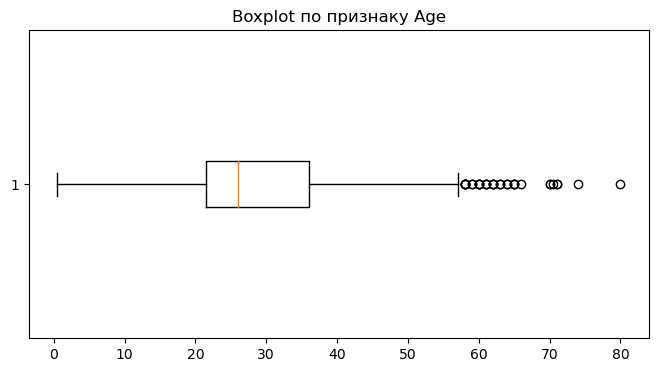

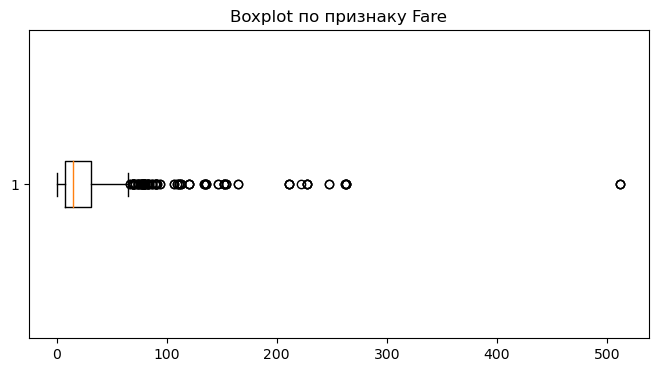

In [438]:
# Визуализируем boxplot для признаков Fare и Age на train-данных
for feature in ['Age', 'Fare']:
    plt.figure(figsize=(8, 4))
    plt.boxplot(train[feature], vert=False)
    plt.title(f'Boxplot по признаку {feature}')
    plt.show()

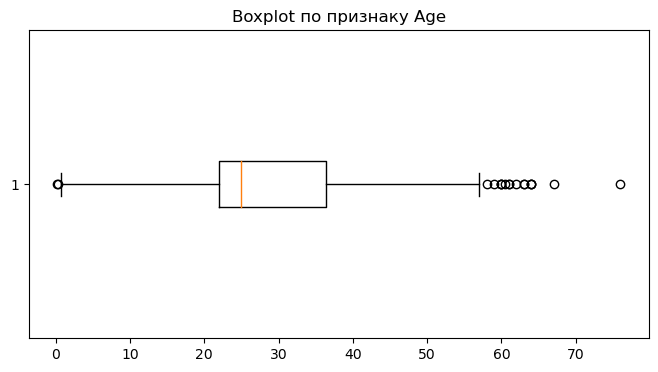

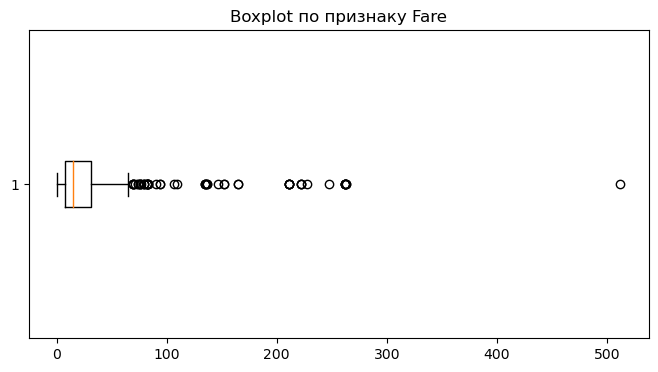

In [439]:
# Визуализируем boxplot для признаков Fare и Age на test-данных
for feature in ['Age', 'Fare']:
    plt.figure(figsize=(8, 4))
    plt.boxplot(test[feature], vert=False)
    plt.title(f'Boxplot по признаку {feature}')
    plt.show()

8. Проверьте данные на наличие выбросов. Удалите выбросы, если считаете это целесообразным. Обоснуйте.

In [440]:
# Определим первый Q1 и Q3 квартиль и IQR межквартильный размах

for feature in ['Age', 'Fare']:
    Q1 = train[feature].quantile(0.25)
    Q3 = train[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = train[(train[feature] < lower_bound) | (train[feature] > upper_bound)]

    print(f"Признак: {feature}")
    print(f"Выбросы: {len(outliers)}")
    print(outliers[feature].sort_values(ascending=False).head())

Признак: Age
Выбросы: 33
630    80.0
851    74.0
96     71.0
493    71.0
116    70.5
Name: Age, dtype: float64
Признак: Fare
Выбросы: 116
679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
Name: Fare, dtype: float64


In [441]:
# Проведем тоже самое для тестовой базы

for feature in ['Age', 'Fare']:
    Q1 = test[feature].quantile(0.25)
    Q3 = test[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = test[(test[feature] < lower_bound) | (test[feature] > upper_bound)]

    print(f"Признак: {feature}")
    print(f"Выбросы: {len(outliers)}")
    print(outliers[feature].sort_values(ascending=False).head())

Признак: Age
Выбросы: 18
96     76.0
81     67.0
179    64.0
305    64.0
236    64.0
Name: Age, dtype: float64
Признак: Fare
Выбросы: 55
343    512.3292
53     263.0000
69     263.0000
375    262.3750
59     262.3750
Name: Fare, dtype: float64


In [442]:
# Удалим выбросы с показателем Fare > 500

train = train[train['Fare'] <= 500]
test = test[test['Fare'] <= 500]

9. Попробуйте математически преобразовать признак Age.

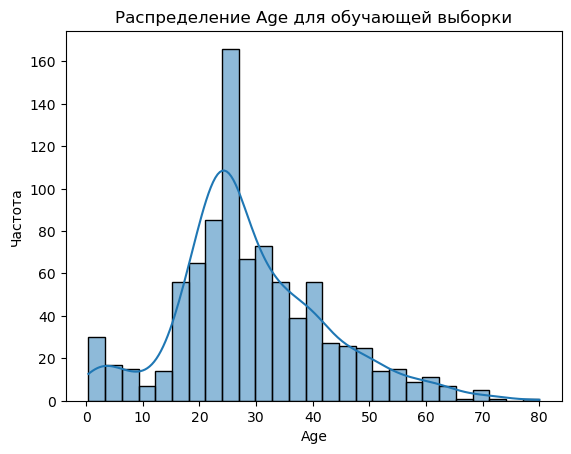

In [443]:
# Построение распределения для train
sns.histplot(train['Age'], kde=True, label='Train')
       
plt.xlabel('Age')
plt.ylabel('Частота')
plt.title('Распределение Age для обучающей выборки')
plt.show()

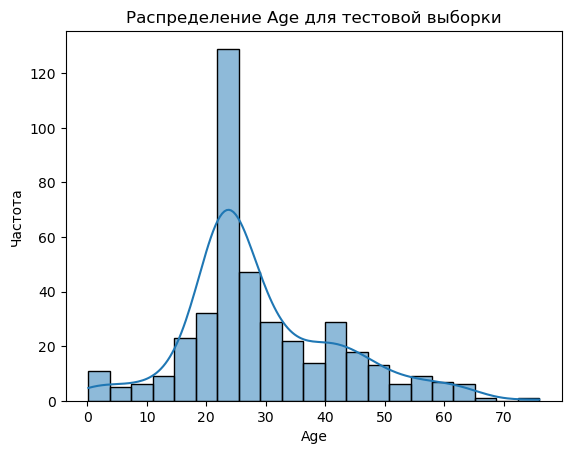

In [444]:
# Построение распределения для test
sns.histplot(test['Age'], kde=True, label='Train')
       
plt.xlabel('Age')
plt.ylabel('Частота')
plt.title('Распределение Age для тестовой выборки')
plt.show()

In [445]:
# Стандартизация

scaler = StandardScaler()
train['Age_scaled'] = scaler.fit_transform(train[['Age']])
test['Age_scaled'] = scaler.fit_transform(test[['Age']])

In [446]:
# Нормализация

scaler = MinMaxScaler()
train['Age_minmax'] = scaler.fit_transform(train[['Age']])
test['Age_minmax'] = scaler.fit_transform(test[['Age']])

In [447]:
# Логарифмирование

train['Age_log'] = np.log1p(train['Age'])
test['Age_log'] = np.log1p(test['Age'])

In [448]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Age_scaled,Age_minmax,Age_log
0,0,3,22.0,1,0,7.2500,0,1,-0.532610,0.271174,3.135494
1,1,1,38.0,1,0,71.2833,1,0,0.669092,0.472229,3.663562
2,1,3,26.0,0,0,7.9250,1,0,-0.232185,0.321438,3.295837
3,1,1,35.0,1,0,53.1000,1,0,0.443773,0.434531,3.583519
4,0,3,35.0,0,0,8.0500,0,1,0.443773,0.434531,3.583519


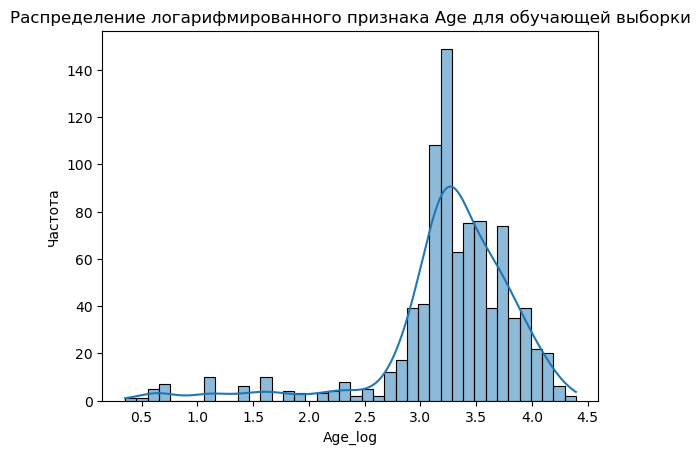

In [449]:
sns.histplot(train['Age_log'], kde=True, label='Train_log')
       
plt.xlabel('Age_log')
plt.ylabel('Частота')
plt.title('Распределение логарифмированного признака Age для обучающей выборки')
plt.show()

10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [450]:
X = train[['Pclass', 'Sex_female', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare']]
y = train['Survived']

In [451]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [452]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Метрика accuracy: {accuracy:.3f}")

Метрика accuracy: 0.848


In [453]:
X = train[['Pclass', 'Sex_female', 'Sex_male', 'Age_scaled', 'SibSp', 'Parch', 'Fare']]
y = train['Survived']

In [454]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [455]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_scaled = accuracy_score(y_test, y_pred)
print(f"Метрика accuracy при стандартизации по Age: {accuracy_scaled:.3f}")

Метрика accuracy при стандартизации по Age: 0.848


In [456]:
X = train[['Pclass', 'Sex_female', 'Sex_male', 'Age_minmax', 'SibSp', 'Parch', 'Fare']]
y = train['Survived']

In [457]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [458]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_minmax = accuracy_score(y_test, y_pred)
print(f"Метрика accuracy при нормализации по Age: {accuracy_minmax:.3f}")

Метрика accuracy при нормализации по Age: 0.837


In [459]:
X = train[['Pclass', 'Sex_female', 'Sex_male', 'Age_log', 'SibSp', 'Parch', 'Fare']]
y = train['Survived']

In [460]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [461]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred)
print(f"Метрика accuracy при логарифмировании по Age: {accuracy_log:.3f}")

Метрика accuracy при логарифмировании по Age: 0.860


In [463]:
data = {
    'Метрика': ['accuracy_data_clean', 'accuracy', 'accuracy_scaled', 'accuracy_minmax', 'accuracy_log'],
    'Значение': [accuracy_data_clean, accuracy, accuracy_scaled, accuracy_minmax, accuracy_log]
}

In [464]:
data = pd.DataFrame(data)
print(data)

               Метрика  Значение
0  accuracy_data_clean  0.729730
1             accuracy  0.848315
2      accuracy_scaled  0.848315
3      accuracy_minmax  0.837079
4         accuracy_log  0.859551


11. Сформулируйте выводы по проделанной работе.
* Кратко опишите какие преобразования были сделаны и почему.
* Сравните метрики моделей из п. 2 и п. 10.
* Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения.
* Нужно ли аналогичным образом исследовать и дополнять действительно большие данные?

### Вывод:
Проанализировали датасет с информацией о пассажирах корабля Титаник. Обучили модель классификации с помощью моделм LogisticRegression с целевым признаком Survived. 
* В первом случае очистили данные от пропусков, имея значимые потери. Accuracy: 0.73.
* Во втором случае заполнили пропуски, убрали выбросы. Также оценили метрику качества модели, преобразуя признак Age. Наилучшим решением определяем использование логарифмирования признака. Accuracy_log: 0.86.